code judul 1 = prediksi kinerja gas. masih belum akurat

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [28]:
# Membaca semua dataset
data_paths = [
    r"C:\Users\HP\Documents\data mining\uts-uas\train\ex_1.csv",
    r"C:\Users\HP\Documents\data mining\uts-uas\train\ex_9.csv",
    r"C:\Users\HP\Documents\data mining\uts-uas\train\ex_20.csv",
    r"C:\Users\HP\Documents\data mining\uts-uas\train\ex_21.csv",
    r"C:\Users\HP\Documents\data mining\uts-uas\train\ex_23.csv",
    r"C:\Users\HP\Documents\data mining\uts-uas\train\ex_24.csv"
]


In [29]:
# Membaca dan menggabungkan dataset
datasets = []
for path in data_paths:
    # Baca dataset
    df = pd.read_csv(path)
    
    # Cek nama kolom yang tersedia
    print(f"Kolom dalam dataset {path}:")
    print(df.columns.tolist())
    
    # Pilih kolom yang diinginkan
    df = df[['time', 'input_voltage', 'el_power']]  # Pisahkan nama kolom
    datasets.append(df)

Kolom dalam dataset C:\Users\HP\Documents\data mining\uts-uas\train\ex_1.csv:
['time', 'input_voltage', 'el_power']
Kolom dalam dataset C:\Users\HP\Documents\data mining\uts-uas\train\ex_9.csv:
['time', 'input_voltage', 'el_power']
Kolom dalam dataset C:\Users\HP\Documents\data mining\uts-uas\train\ex_20.csv:
['time', 'input_voltage', 'el_power']
Kolom dalam dataset C:\Users\HP\Documents\data mining\uts-uas\train\ex_21.csv:
['time', 'input_voltage', 'el_power']
Kolom dalam dataset C:\Users\HP\Documents\data mining\uts-uas\train\ex_23.csv:
['time', 'input_voltage', 'el_power']
Kolom dalam dataset C:\Users\HP\Documents\data mining\uts-uas\train\ex_24.csv:
['time', 'input_voltage', 'el_power']


In [30]:
# Menggabungkan semua dataset
train_data = pd.concat(datasets, ignore_index=True)

In [31]:
# Cetak informasi data
print("\nShape data sebelum preprocessing:", train_data.shape)
print("\nSample data:")
print(train_data.head())



Shape data sebelum preprocessing: (52940, 3)

Sample data:
        time  input_voltage     el_power
0  810.07028           10.0  1228.791720
1  811.06938           10.0  1223.041745
2  812.06848           10.0  1244.960866
3  813.06758           10.0  1229.259058
4  814.06668           10.0  1248.117024


In [32]:
# Preprocessing data - hanya gunakan input_voltage dan el_power untuk prediksi
features = train_data[['input_voltage', 'el_power']]
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(features)
print("\nShape data setelah scaling:", train_data_scaled.shape)


Shape data setelah scaling: (52940, 2)


In [33]:
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    
    for i in range(len(data) - seq_length):
        # Mengambil sequence
        seq = data[i:(i + seq_length)]
        # Mengambil target (nilai selanjutnya setelah sequence)
        target = data[i + seq_length]
        sequences.append(seq)
        targets.append(target)
    
    return np.array(sequences), np.array(targets)


In [34]:
# Membuat sequence data
seq_length = 10
X_train, y_train = create_sequences(train_data_scaled, seq_length)

In [35]:
# Cetak informasi bentuk data
print("\nShape X_train sebelum reshape:", X_train.shape)
print("\nShape y_train:", y_train.shape)


Shape X_train sebelum reshape: (52930, 10, 2)

Shape y_train: (52930, 2)


In [36]:
# Reshape data untuk LSTM [samples, time steps, features]
X_train = np.array(X_train)
y_train = np.array(y_train)

print("Shape X_train setelah reshape:", X_train.shape)

Shape X_train setelah reshape: (52930, 10, 2)


In [37]:
# Membuat dan melatih model LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, train_data_scaled.shape[1])),
    Dense(train_data_scaled.shape[1])
])

model.compile(optimizer='adam', loss='mse')
print("\nModel summary:")
model.summary()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Model summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,702 (41.80 KB)

 Trainable params: 10,702 (41.80 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Melatih model
history = model.fit(X_train, y_train, 
                   epochs=100,
                   batch_size=32,
                   validation_split=0.2,
                   verbose=1)

Epoch 1/100
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.0225 - val_loss: 3.2062e-04
Epoch 2/100
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 4.6447e-04 - val_loss: 2.7125e-04
Epoch 3/100
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 3.8920e-04 - val_loss: 1.5189e-04
Epoch 4/100
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 3.0993e-04 - val_loss: 8.9446e-05
Epoch 5/100
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 2.6334e-04 - val_loss: 1.0247e-04
Epoch 6/100
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 1.4248e-04 - val_loss: 1.0907e-04
Epoch 7/100
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 2.0255e-04 - val_loss: 1.3406e-04
Epoch 8/100
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 1.8663e-04 - val_loss: 7.1671e-05
Epoch 9/100
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 1.7102e-04 - val_loss: 7.4004e-05
Epoch 10/100
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 1.7233e-04 - val_loss: 7.4449e-05
Epoch 11/100
1324/1324 ━

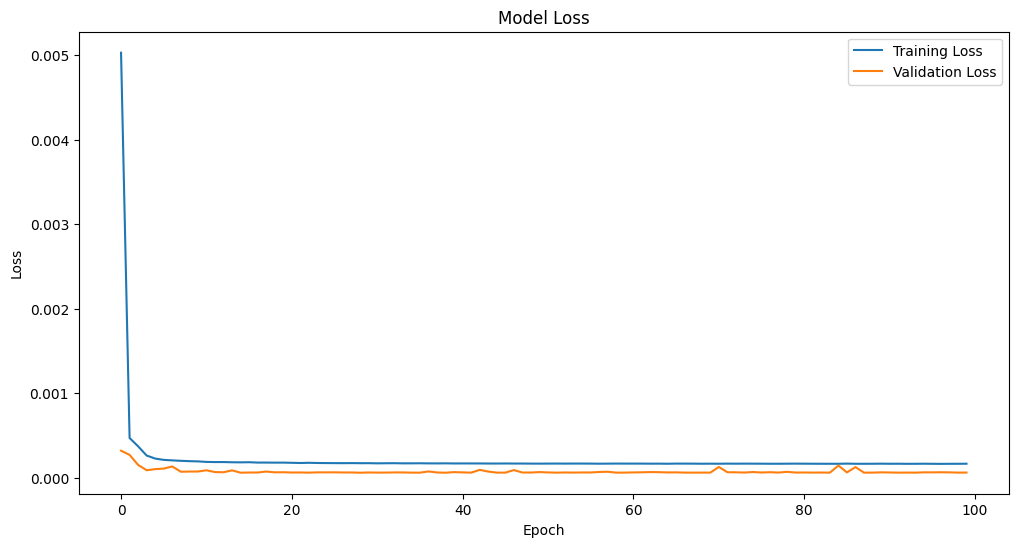

In [39]:
# Visualisasi hasil training
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()